# Project of Data Analysis

## Dataset: Data Science Salary

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dataset Info

* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year
* employment_type: The type of employment for the role
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd: The salary in USD
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely
* company_location: The country of the employer's main office or contracting branch
* company_size: The median number of people that worked for the company during the year

In [4]:
df = pd.read_csv('ds_salaries.csv')

In [5]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
645,2023,SE,FT,Data Engineer,172600,USD,172600,US,100,US,M
144,2023,SE,FT,Data Analyst,138900,USD,138900,US,0,US,M
2463,2022,SE,FT,Data Engineer,170000,USD,170000,US,0,US,M
1422,2023,SE,FT,Applied Scientist,262500,USD,262500,US,0,US,L
34,2023,SE,FT,Computer Vision Engineer,184590,USD,184590,US,0,US,M
2920,2022,SE,FT,Analytics Engineer,63000,USD,63000,US,0,US,M
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
2662,2022,MI,FT,Data Scientist,108000,USD,108000,US,50,US,L
947,2023,SE,FT,Machine Learning Engineer,142200,USD,142200,US,0,US,M
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


In [6]:
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'])

# Group by work_year and calculate mean salary and mean remote_ratio
yearly_stats = df.groupby('work_year').agg({'salary_in_usd': 'mean', 'remote_ratio': 'mean'}).reset_index()

# Print or display the results
print(yearly_stats)

   work_year  salary_in_usd  remote_ratio
0       2020   92302.631579     65.131579
1       2021   94087.208696     68.695652
2       2022  133338.620793     55.408654
3       2023  149045.541176     34.061625


In [7]:
# Checking Unique Values in Employment Type Column
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [8]:
# Checking Unique Values in Experience Level Column
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [9]:
df['remote_ratio'].value_counts()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

In [10]:
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

# Understanding of Data through Visualization

<ipython-input-11-aa5c550b62b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


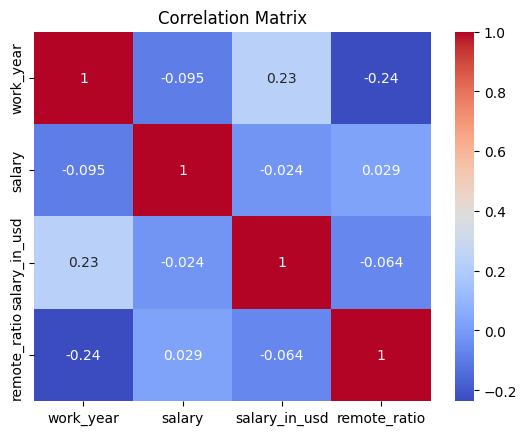

In [11]:
# **5. Heatmap for Correlation Matrix**
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


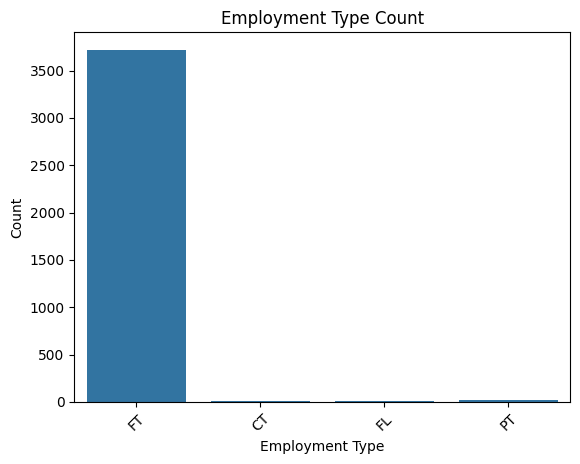

In [12]:
# prompt: Generate all possible graphs for this dataset analysis

import matplotlib.pyplot as plt
# **1. Bar Chart for Employment Type**
sns.countplot(x='employment_type', data=df)
plt.title('Employment Type Count')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

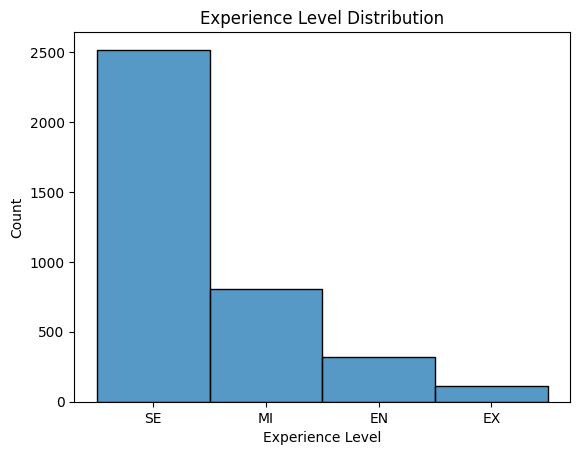

In [13]:
# **2. Histogram for Experience Level**
sns.histplot(df['experience_level'], bins=20)
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

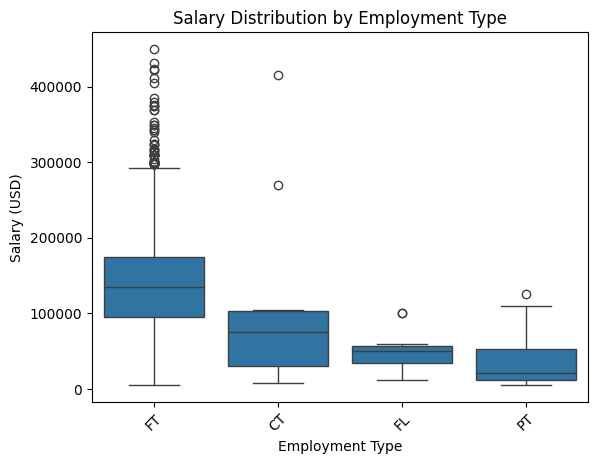

In [14]:
# **4. Box Plot for Salary by Employment Type**
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

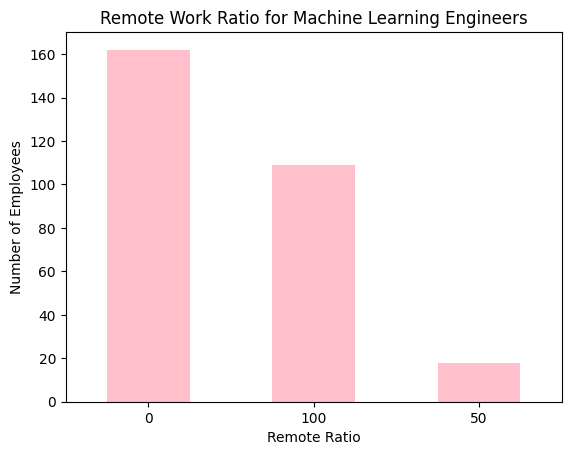

In [15]:
ml_engineer_df = df[df['job_title'] == 'Machine Learning Engineer']

# Group by remote_ratio and count the occurrences
remote_ratio_counts = ml_engineer_df['remote_ratio'].value_counts()

# Plot the bar chart
remote_ratio_counts.plot(kind='bar', color='pink')

# Customize the plot
plt.title('Remote Work Ratio for Machine Learning Engineers')
plt.xlabel('Remote Ratio')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()

In [18]:
df['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

<ipython-input-19-3a3a0c66a54c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_df.index, y=count_df.values, palette="viridis")


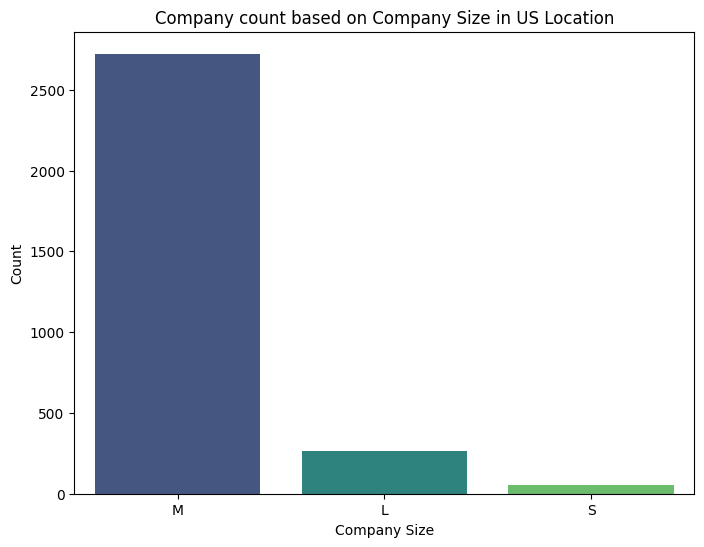

In [19]:
us_df = df[df['company_location'] == 'US']

count_df = us_df['company_size'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=count_df.index, y=count_df.values, palette="viridis")
plt.title('Company count based on Company Size in US Location')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

<ipython-input-21-53965602a9e8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_df.index, y=count_df.values, palette="viridis")


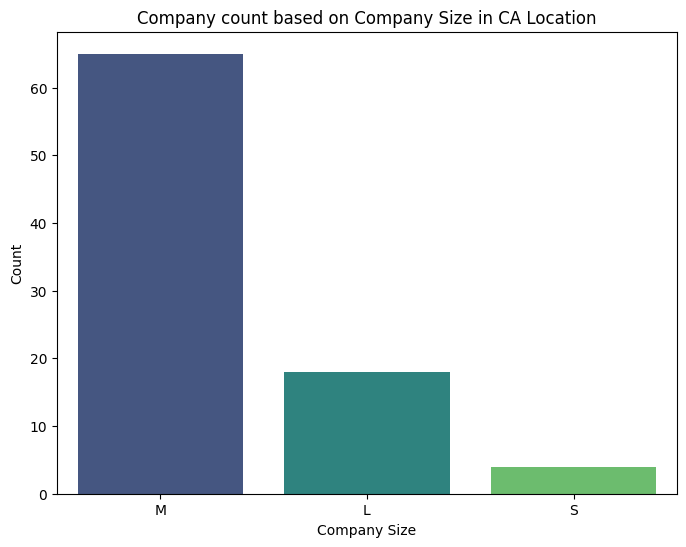

In [21]:
us_df = df[df['company_location'] == 'CA']

count_df = us_df['company_size'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=count_df.index, y=count_df.values, palette="viridis")
plt.title('Company count based on Company Size in CA Location')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()